#  KMeans

## 案例：银行客户分群模型

1. 读取数据

In [1]:
import pandas as pd
data = pd.read_excel('客户信息.xlsx')
data.head()

,年龄(岁),收入(万元)
0,50,66
1,44,51
2,30,56
3,46,50
4,32,50


2. 可视化展示

d:\1_Software\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


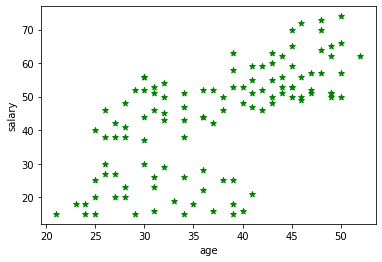

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c="green", marker='*')  # 以绿色星星样式绘制散点图
plt.xlabel('age') 
plt.ylabel('salary')  
plt.show()

3. 肘部法选择K值(The Elbow Sum-of-Squares Method)
$$SS = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

Text(0, 0.5, 'SS')

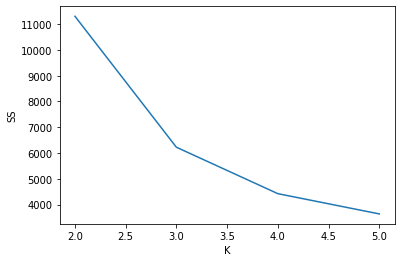

In [9]:
SS = []
from sklearn.cluster import KMeans
for K in range(2, 6):
    kmeans = KMeans(n_clusters = K).fit(data) 
    SS.append(kmeans.inertia_)
    
plt.plot(range(2,6), SS)
plt.xlabel('K')
plt.ylabel('SS')

4. 数据建模

In [15]:
kms = KMeans(n_clusters=3, random_state=123)
kms.fit(data)
# label = kms.labels_
label = kms.fit_predict(data)

5. 建模效果可视化展示

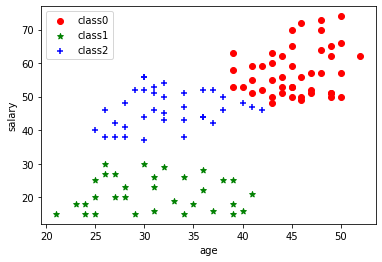

In [5]:
plt.scatter(data[label == 0].iloc[:, 0], data[label == 0].iloc[:, 1], c="red", marker='o', label='class0')  # 以红色圆圈样式绘制散点图并加上标签  
plt.scatter(data[label == 1].iloc[:, 0], data[label == 1].iloc[:, 1], c="green", marker='*', label='class1')  # 以绿色星星样式绘制散点图并加上标签 
plt.scatter(data[label == 2].iloc[:, 0], data[label == 2].iloc[:, 1], c="blue", marker='+', label='class2')  # 以蓝色加号样式绘制散点图并加上标签
plt.xlabel('age')  # 添加x轴名称
plt.ylabel('salary')  # 添加y轴名称
plt.legend()  # 设置图例

5. 查看各类别的人均收入

In [6]:
print(data[label == 0].iloc[:, 1].mean())  # 看下分类为标签0的人的收入均值，iloc[:, 1]为data表格的第二列，也即“收入”列
print(data[label == 1].iloc[:, 1].mean())
print(data[label == 2].iloc[:, 1].mean())

57.55555555555556
21.125
46.285714285714285
